In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [9]:
df.drop(columns=['show_id', 'description', 'director', 'cast', 'date_added'], inplace=True)
df.dropna(inplace=True)

def parse_duration(x):
    if 'min' in x:
        return int(x.split()[0])
    elif 'Season' in x:
        return int(x.split()[0]) * 60
    return 0

df['duration_minutes'] = df['duration'].apply(parse_duration)
df.drop(columns='duration', inplace=True)

le_country = LabelEncoder()
df['country'] = le_country.fit_transform(df['country'])

df = pd.get_dummies(df, columns=['type', 'rating'], drop_first=True)

genre_set = set()
for genres in df['listed_in']:
    genre_set.update(g.strip() for g in genres.split(','))

for genre in genre_set:
    df[f'genre_{genre}'] = df['listed_in'].apply(lambda x: int(genre in x))

titles = df['title'].reset_index(drop=True)
df.drop(columns=['title', 'listed_in'], inplace=True)


In [8]:
from google.colab import files
uploaded = files.upload()  # upload the CSV file here

df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
df.head()


Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING (2).csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(scaled_data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

clustered_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
clustered_df['Cluster'] = clusters
clustered_df['Title'] = titles


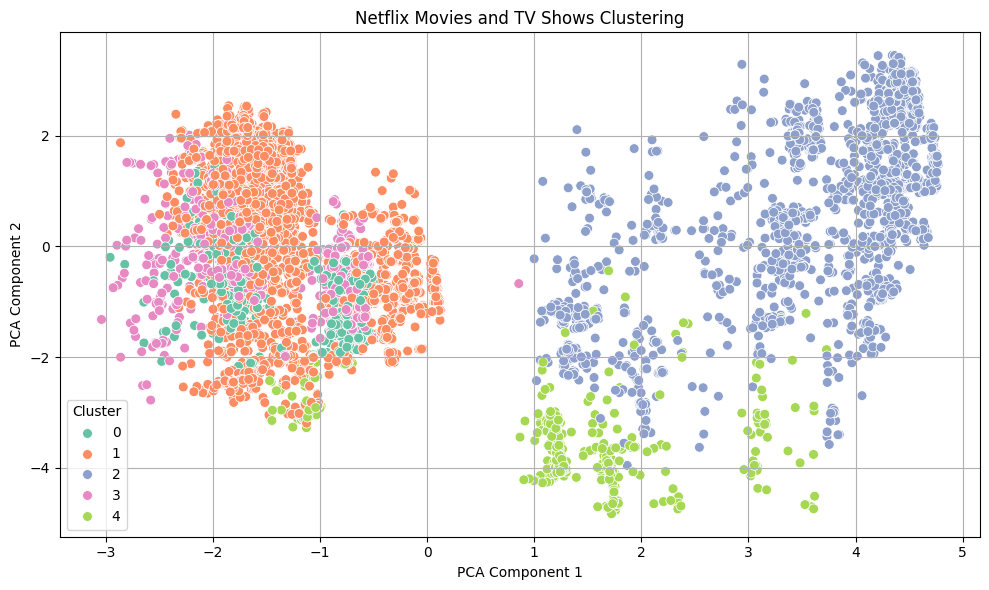

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustered_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=50)
plt.title("Netflix Movies and TV Shows Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()
